In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Customer_Segmentation_py.csv')
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26/11/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26/11/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23/03/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23/03/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15/05/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,12/04/2016,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,02/04/2014,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,02/04/2016,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,04/03/2014,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [3]:
# Q1: Distribution of customers across different age groups (Age_Group)

age_group_counts = df['Age_Group'].value_counts().sort_index()
print("Q1: Distribution of customers across Age Groups")
print(age_group_counts)

Q1: Distribution of customers across Age Groups
Age_Group
Adults (35-64)          55824
Seniors (64+)             730
Young Adults (25-34)    38654
Youth (<25)             17828
Name: count, dtype: int64


In [ ]:
# Q2: Customer_Gender variation across different countries or states

gender_country = pd.crosstab(df['Country'], df['Customer_Gender'])
gender_state = pd.crosstab(df['State'], df['Customer_Gender'])

print("Q2: Customer Gender Variation by Country")
print(gender_country)
print("\nQ2: Customer Gender Variation by State")
print(gender_state)

In [ ]:
# Q3: Most popular Product_Category and Sub_Category in terms of Order_Quantity

category_popularity = df.groupby('Product_Category')['Order_Quantity'].sum().sort_values(ascending=False)
subcategory_popularity = df.groupby('Sub_Category')['Order_Quantity'].sum().sort_values(ascending=False)

print("Q3: Most Popular Product_Category")
print(category_popularity.head(1))
print("\nQ3: Most Popular Sub_Category")
print(subcategory_popularity.head(1))

In [ ]:
# Q4: Segment customers using K-Means clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Customer_Segmentation_py.csv")

# Select features for clustering
X = df[['Order_Quantity', 'Profit', 'Revenue']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means clustering (3 clusters as example)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("Q4: Cluster value counts")
print(df['Cluster'].value_counts())

In [ ]:
# Q5 — Characteristics of each cluster

cluster_characteristics = df.groupby('Cluster')[['Order_Quantity', 'Profit', 'Revenue']].mean()

print("Q5: Average metrics per cluster")
print(cluster_characteristics)

In [ ]:
# Q6: Which Product_Category or Sub_Category generates the highest Profit and Revenue

category_profit = df.groupby('Product_Category')[['Profit', 'Revenue']].sum().sort_values(by='Profit', ascending=False)
subcategory_profit = df.groupby('Sub_Category')[['Profit', 'Revenue']].sum().sort_values(by='Profit', ascending=False)

print("Q6: Product_Category with Highest Profit and Revenue")
print(category_profit.head(1))
print("\nQ6: Sub_Category with Highest Profit and Revenue")
print(subcategory_profit.head(1))

In [ ]:
# Q7 — Relationship between Unit_Cost, Unit_Price, and Profit

correlation_matrix = df[['Unit_Cost', 'Unit_Price', 'Profit']].corr()

print("Q7: Correlation between Unit_Cost, Unit_Price, and Profit")
print(correlation_matrix)

In [ ]:
# Q8 — Which Age_Group contributes most to Revenue and Profit

age_group_contrib = df.groupby('Age_Group')[['Revenue', 'Profit']].sum().sort_values(by='Revenue', ascending=False)

print("Q8: Age Group Contribution to Revenue and Profit")
print(age_group_contrib.head(1))

In [ ]:
# Q9 — How does customer spending (Revenue) differ between Customer_Gender groups

gender_revenue = df.groupby('Customer_Gender')['Revenue'].mean()

print("Q9: Average Revenue by Customer Gender")
print(gender_revenue)

In [ ]:
# Q10 — Analyze the monthly or yearly trends in Revenue and Profit

yearly_trends = df.groupby('Year')[['Revenue', 'Profit']].sum()
monthly_trends = df.groupby('Month')[['Revenue', 'Profit']].sum()

print("Q10: Yearly Trends in Revenue and Profit")
print(yearly_trends)
print("\nQ10: Monthly Trends in Revenue and Profit")
print(monthly_trends)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Features and target
X = df[['Customer_Age', 'Unit_Cost', 'Unit_Price', 'Order_Quantity', 'Revenue']]
y = df['Profit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)


print("\n--- Predict Profit Based on Your Input ---")
cust_age = float(input("Enter Customer Age: "))
unit_cost = float(input("Enter Unit Cost: "))
unit_price = float(input("Enter Unit Price: "))
order_qty = float(input("Enter Order Quantity: "))
revenue = float(input("Enter Revenue: "))

# prediction
user_input = pd.DataFrame([[cust_age, unit_cost, unit_price, order_qty, revenue]],
                          columns=X.columns)
predicted_profit = lr.predict(user_input)[0]

print(f"\nPredicted Profit: {predicted_profit:.2f}")



--- Predict Profit Based on Your Input ---


Enter Customer Age:  12
Enter Unit Cost:  12
Enter Unit Price:  2333
Enter Order Quantity:  1234
Enter Revenue:  21111



Predicted Profit: 12349.09


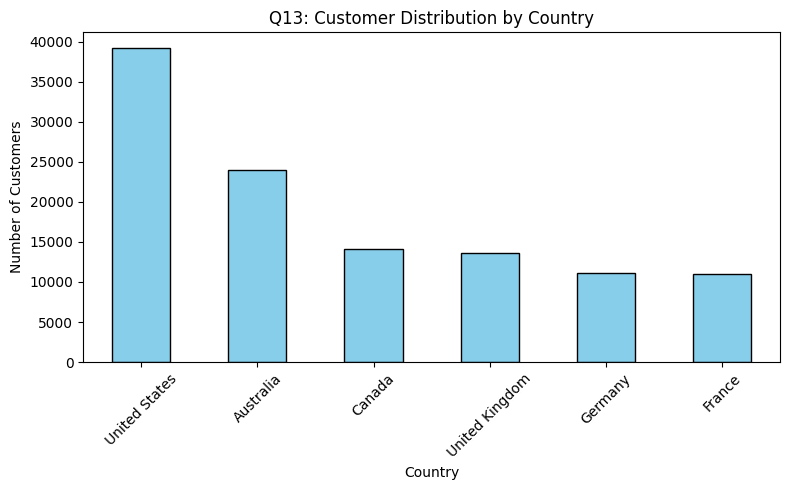

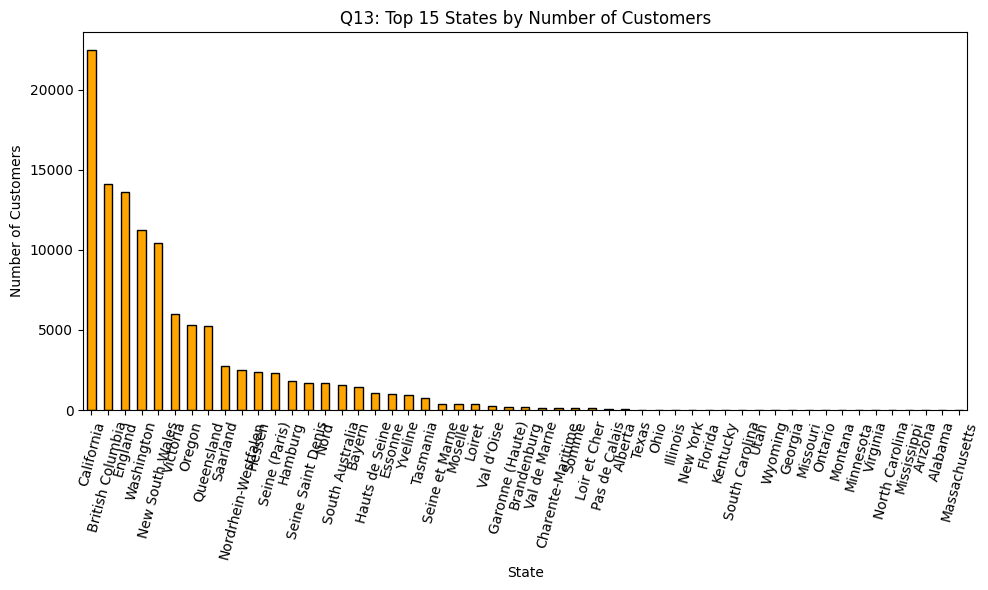

In [5]:
# Q13 — Visualize the customer distribution by Country and State

import matplotlib.pyplot as plt

df = pd.read_csv("Customer_Segmentation_py.csv")

# Country distribution
country_counts = df['Country'].value_counts()

plt.figure(figsize=(8, 5))
country_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Customer Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


state_counts = df['State'].value_counts()

plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title(" Customer distribution by state")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

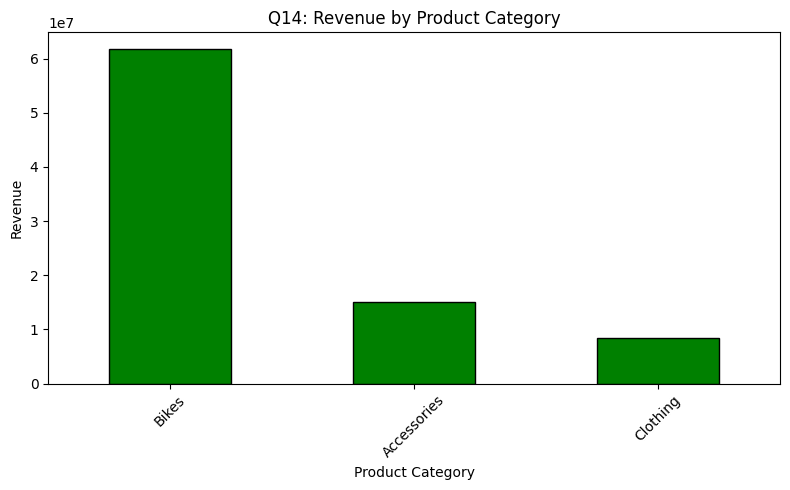

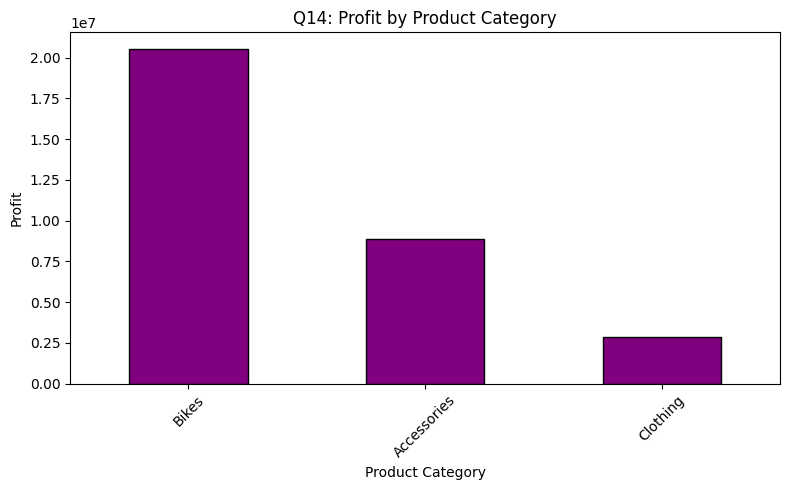

In [6]:
# Q14 — Bar chart showing Revenue or Profit for each Product_Category

category_revenue_profit = df.groupby('Product_Category')[['Revenue', 'Profit']].sum().sort_values(by='Revenue', ascending=False)

# Revenue plot
plt.figure(figsize=(8, 5))
category_revenue_profit['Revenue'].plot(kind='bar', color='green', edgecolor='black')
plt.title("Q14: Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Profit plot
plt.figure(figsize=(8, 5))
category_revenue_profit['Profit'].plot(kind='bar', color='purple', edgecolor='black')
plt.title("Q14: Profit by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()